<a href="https://colab.research.google.com/github/GiridurgaG/ML-Regression-Capstone-project/blob/main/TED_Talk_Views_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **TED Talk Views Prediction Capstone Project**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Giridurga G P

# **Project Summary -**

TED, which stands for Technology, Entertainment, and Design, is a renowned American-Canadian non-profit media organization that shares global talks online, freely available under the slogan "ideas worth spreading." It was founded in February 1984 by Richard Saul Wurman and Harry Marks as a tech-focused conference. One of its notable early moments was a demonstration of the compact disc by Mickey Schulhof, which had only been invented two years earlier. Since 1990, TED has grown into a global movement, hosting talks on a wide range of topics — from science and technology to education, business, and global issues — now available in over 100 languages. TEDx, its independently organized format, has hosted over 13,000 events in at least 150 countries.

For this project, I worked with a TED dataset compiled from 2006 to 2020, containing 4,005 TED Talks and 19 features. These features include data like the speaker's name, talk duration, number of comments, recorded and published dates, event, and of course, the number of views — which is our target variable. The primary goal of the project is to build a predictive regression model that can estimate the number of views a TED Talk will receive based on its attributes.

**Libraries Used:**

**Data Manipulation & Analysis:**

*   pandas - for reading, cleaning, and transforming tabular data.
*   numpy - for numerical computations and handling arrays.
*   math - for mathematical operations (e.g., logarithmic transformations, rounding).

**Data Visualization:**

*   matplotlib - for creating basic plots (line, bar, scatter, histograms, boxplots).
*   seaborn - for advanced statistical visualizations (e.g., correlation heatmaps, pairplots).
*   plotly - for interactive plots (optional but useful for deeper visual analysis).

**Machine Learning:**

*   scikit-learn (sklearn) - for:
  *   Regression models (Linear Regression, Decision Tree, etc.)
  *   Model selection tools (train-test split, cross-validation)
  *   Feature scaling (StandardScaler, MinMaxScaler)
  *   Model evaluation metrics (MAE, MSE, RMSE, R², etc.)
  *   Hyperparameter tuning (GridSearchCV, RandomizedSearchCV)

# **GitHub Link -**

https://github.com/GiridurgaG/WorkBook/blob/main/TED_Talk_Views_Prediction(Regression).ipynb

# **Problem Statement**


The main objective is to build a machine learning model that can accurately predict how popular a TED Talk will be (in terms of views), based on various features available before or shortly after it's published. Beyond just prediction, I also hope to uncover what factors tend to drive viewership.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Dataset Loading

In [ ]:
# Mounting google drive to access csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

talk_id                            title         speaker_1  \
0        1      Averting the climate crisis           Al Gore   
1       92  The best stats you've ever seen      Hans Rosling   
2        7                 Simplicity sells       David Pogue   
3       53              Greening the ghetto     Majora Carter   
4       66      Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                    occupations  \
0           {0: 'Al Gore'}                      {0: ['climate advocate']}   
1      {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2       {0: 'David Pogue'}                  {0: ['technology columnist']}   
3     {0: 'Majora Carter'}    {0: ['activist for environmental justice']}   
4  {0: 'Sir Ken Robinson'}                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...   2664069    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  65051954    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0      1286   
3  ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0      1116   
4  ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...    4931.0      1164   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...  
3  If you're here today — and I'm very happy that...  
4  Good morning. How are you? (Audience) Good. It...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

<Axes: >

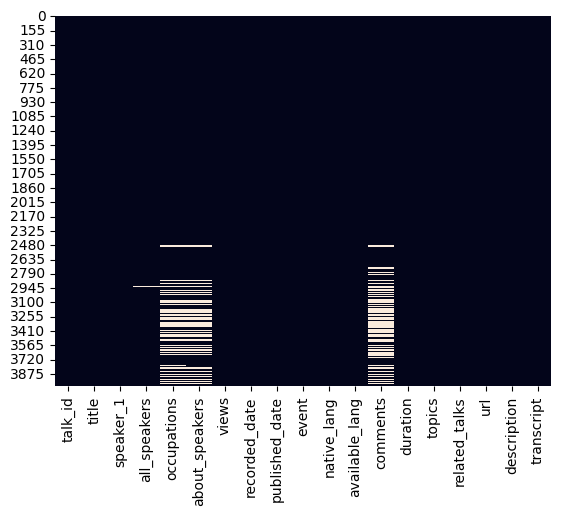

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This dataset contains 4005 rows with 19 columns.

It has some null values.

*   all_speakers    - 4
*   occupations     - 522
*   about_speakers  - 503
*   recorded_date   - 1
*   comments        - 655

It has 15 categorical and 4 numerical columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
df.describe()

talk_id         views     comments     duration
count   4005.000000  4.005000e+03  3350.000000  4005.000000
mean   12432.538327  2.148006e+06   161.997015   724.011236
std    17447.576262  3.451226e+06   268.838922   361.775462
min        1.000000  0.000000e+00     0.000000    60.000000
25%     1252.000000  8.820690e+05    38.000000   393.000000
50%     2333.000000  1.375508e+06    89.000000   738.000000
75%    23777.000000  2.133110e+06   188.000000   974.000000
max    62794.000000  6.505195e+07  6449.000000  3922.000000

In [ ]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

### Variables Description

**talk_id:** Id of talk provided by TED

**title:** Title of the topic discussed

**speaker_1:** First speaker

**all_speakers:** Name of all speakers

**occupations:** Occupation of all the speakers

**about_speakers:** About the speakers

**views:** Total number of views

**recorder_date:** Recording Date of video

**published_date:** Published Date of video

**event:** Event in which talk was given

**native_lang:** Original language in which talk was given

**available_lang:** All the available languages for the talk

**comments:** Total number of comments

**duration:** Duration of talk in seconds

**topics:** Topics for the talk

**related_talks:** Related talks

**url:** URL of the talk

**description:** Description of the talk

**transcript:** Transcript of the talk

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique(),".")

No. of unique values in talk_id is 4005 .
No. of unique values in title is 4005 .
No. of unique values in speaker_1 is 3274 .
No. of unique values in all_speakers is 3306 .
No. of unique values in occupations is 2049 .
No. of unique values in about_speakers is 2977 .
No. of unique values in views is 3996 .
No. of unique values in recorded_date is 1334 .
No. of unique values in published_date is 2962 .
No. of unique values in event is 459 .
No. of unique values in native_lang is 12 .
No. of unique values in available_lang is 3902 .
No. of unique values in comments is 601 .
No. of unique values in duration is 1188 .
No. of unique values in topics is 3977 .
No. of unique values in related_talks is 4005 .
No. of unique values in url is 4005 .
No. of unique values in description is 4005 .
No. of unique values in transcript is 4005 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Fill the null values
df.fillna({'all_speakers': 'name_absent', 'occupations': 'not available', 'about_speakers': 'not available', 'comments': 0, 'recorded_date':'0000-00-00'}, inplace = True)

In [ ]:
# Checking for null values
df.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [ ]:
# Converting published_date into datetime data type
df['published_date'] = pd.to_datetime(df['published_date'])
df['recorded_date'] = pd.to_datetime(df['recorded_date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
# Checking data type of published_date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4005 non-null   int64         
 1   title           4005 non-null   object        
 2   speaker_1       4005 non-null   object        
 3   all_speakers    4005 non-null   object        
 4   occupations     4005 non-null   object        
 5   about_speakers  4005 non-null   object        
 6   views           4005 non-null   int64         
 7   recorded_date   4004 non-null   datetime64[ns]
 8   published_date  4005 non-null   datetime64[ns]
 9   event           4005 non-null   object        
 10  native_lang     4005 non-null   object        
 11  available_lang  4005 non-null   object        
 12  comments        4005 non-null   float64       
 13  duration        4005 non-null   int64         
 14  topics          4005 non-null   object        
 15  rela

In [ ]:
# Extracting year, month and day from published_date
df['published_year'] = df.published_date.dt.year
df['published_month'] = df.published_date.dt.month
df['published_day'] = df.published_date.dt.day

In [ ]:
# Checking first five entries
df.head()

talk_id                            title         speaker_1  \
0        1      Averting the climate crisis           Al Gore   
1       92  The best stats you've ever seen      Hans Rosling   
2        7                 Simplicity sells       David Pogue   
3       53              Greening the ghetto     Majora Carter   
4       66      Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                    occupations  \
0           {0: 'Al Gore'}                      {0: ['climate advocate']}   
1      {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2       {0: 'David Pogue'}                  {0: ['technology columnist']}   
3     {0: 'Majora Carter'}    {0: ['activist for environmental justice']}   
4  {0: 'Sir Ken Robinson'}                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...   2664069    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  65051954    2006-02-25   

  published_date    event  ... comments duration  \
0     2006-06-27  TED2006  ...    272.0      977   
1     2006-06-27  TED2006  ...    628.0     1190   
2     2006-06-27  TED2006  ...    124.0     1286   
3     2006-06-27  TED2006  ...    219.0     1116   
4     2006-06-27  TED2006  ...   4931.0     1164   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript published_year  \
0  Thank you so much, Chris. And it's truly a gre...           2006   
1  About 10 years ago, I took on the task to teac...           2006   
2  (Music: "The Sound of Silence," Simon & Garfun...           2006   
3  If you're here today — and I'm very happy that...           2006   
4  Good morning. How are you? (Audience) Good. It...           2006   

  published_month  published_day  
0               6             27  
1               6             27  
2               6             27  
3               6             27  
4               6             27  

[5 rows x 22 columns]

In [ ]:
# Checking Column names
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_year',
       'published_month', 'published_day'],
      dtype='object')

### What all manipulations have you done and insights you found?

*   Checked for null values
*   Filled the missing values with fillna method
*   Converted published_date and recorded_date into datetime data type
*   Extracted year, month and day from published_date

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

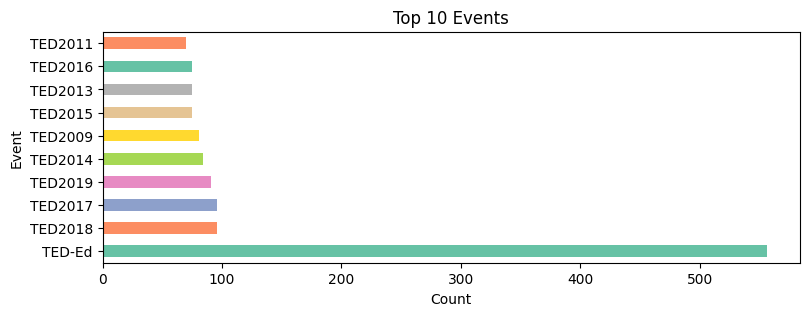

In [ ]:
# Chart - 1 visualization code
Top_events = df['event'].value_counts().sort_values(ascending=False).head(10)
Top_events.plot(kind = 'barh', color = sns.color_palette('Set2'), figsize=(9,3))
plt.xlabel('Count')
plt.ylabel('Event')
plt.title('Top 10 Events')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen for the following reasons:

*   Category names (Event names) are relatively long and more readable horizontally.
*   It allows for easy comparison of counts across different TED events.
*   Horizontal bars handle categorical axes with multiple labels better than vertical bar charts.

##### 2. What is/are the insight(s) found from the chart?

*   TED-Ed is by far the most frequently occurring event, with over 550+ counts, which significantly surpasses all others.
*   Events like TED2018, TED2017, TED2019, and TED2016 have similar counts (around 100), showing a moderate level of activity.
*   Older events like TED2009, TED2011, and TED2013 have lower counts, suggesting reduced current relevance or less frequent usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive business decisions:

*   Content Strategy: Emphasizing or expanding TED-Ed-related content could align with audience interest, increasing engagement or educational impact.

*   Marketing Focus: Prioritize promotion and sponsorship for high-impact events like TED-Ed.

*   Resource Allocation: Lower-count events may need revitalization or could be phased out to optimize resources.

#### Chart - 2

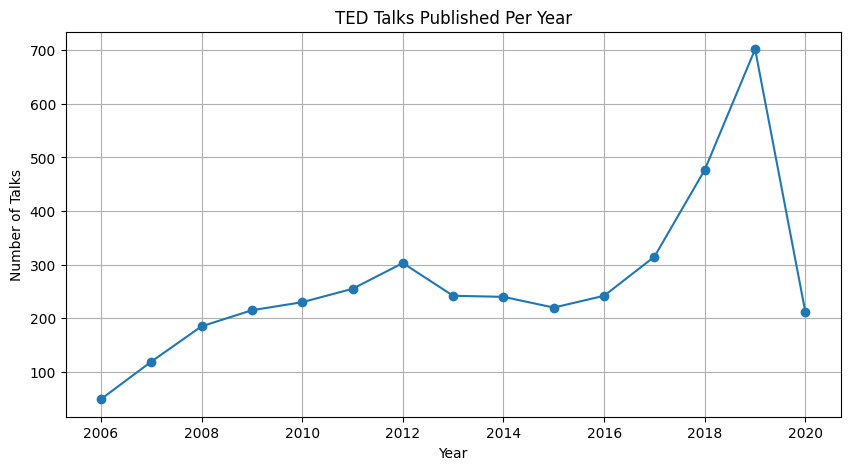

In [ ]:
# Chart - 2 visualization code
df['published_year'].value_counts().sort_index().plot(kind='line', marker='o', figsize=(10,5))
plt.title('TED Talks Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Talks')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for this type of data because:

*   It shows trends over time, which is the goal when plotting data across years.

*   It's easier to see growth, decline, and fluctuations year by year.

##### 2. What is/are the insight(s) found from the chart?

*   There is a steady increase from 2006 to 2012, showing initial growth.

*   A slight dip or plateau occurs from 2013 to 2016.

*   From 2017 to 2019, there's a sharp increase, peaking in 2019 with ~700 talks.

*   In 2020, there's a dramatic drop, which may correlate with global disruptions like the COVID-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely.
1.  Strategic Planning:

  *   The surge until 2019 indicates growing interest and capacity—future investments could build on that momentum.
  *   The 2020 drop signals a need to explore online or alternative formats to maintain consistency during global crises.

2.  Content Forecasting:

  *   Identifying years of peak activity helps anticipate viewer expectations and demand.
  *   Planning future events can be informed by analyzing what made high-output years (like 2019) successful.

3. Budget and Resource Allocation:

  *   More talks in some years suggest greater resource requirements—valuable for annual planning.
  *   Years with fewer talks might reflect shifting strategies or constraints, informing future risk management.

#### Chart - 3

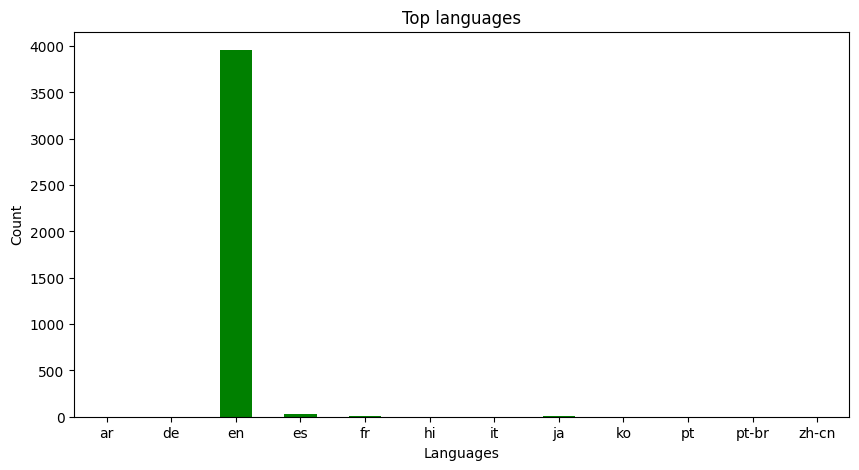

In [ ]:
# Chart - 3 visualization code
df['native_lang'].value_counts().sort_index().plot(kind='bar',figsize=(10,5), color='green')
plt.title('Top languages')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

I chose this bar chart to visualize the distribution of languages in the TED Talk dataset. Since languages are categorical and the goal is to understand the frequency/count of talks available in each language, a bar chart is the most effective choice.

##### 2. What is/are the insight(s) found from the chart?

*   English (en) is the overwhelmingly dominant language, accounting for nearly all (~4000) TED Talks.
*   Other languages like Spanish (es), French (fr), Japanese (ja), and German (de) have very minimal representation.
*   Languages such as Hindi (hi), Portuguese (pt, pt-br), Chinese (zh-cn), and others are either barely present or completely absent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely.

*   The insight highlights a strong concentration in English, signaling an opportunity to expand multilingual content to reach broader global audiences.
*   By localizing content (adding subtitles or translated versions), TED could increase engagement in non-English speaking regions, leading to:
  *   Higher viewership.
  *   Greater inclusivity.
  *   Stronger community presence globally.

Negative Growth Risk:
*   Lack of language diversity means TED is underutilizing its global potential.
*   Audiences who prefer native languages may not engage fully, resulting in lower viewership, accessibility gaps, and reduced global impact.

#### Chart - 4

In [ ]:
# Speakers vs total number of views
Top_speakers = df.groupby('speaker_1')['views'].sum().sort_values(ascending=False).head(10)
Top_speakers

speaker_1
Alex Gendler        117619583
Sir Ken Robinson     84380518
James Veitch         78843641
Simon Sinek          62661183
Brené Brown          61285977
Bill Gates           57107176
Amy Cuddy            57074270
Julian Treasure      54799681
Hans Rosling         39871561
Tim Urban            37976820
Name: views, dtype: int64

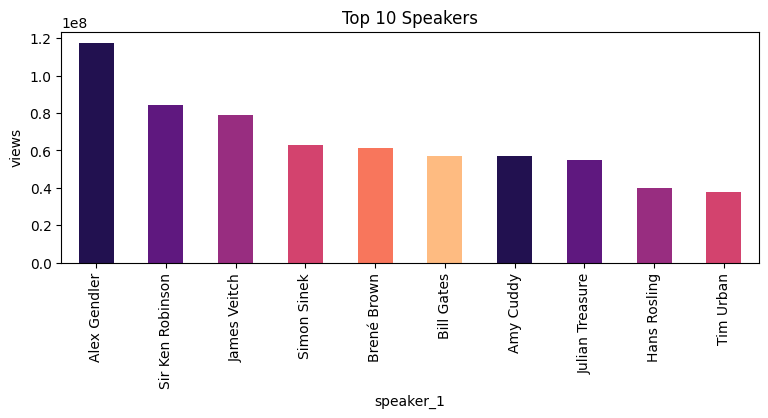

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(9,3))
Top_speakers.plot(kind = 'bar', color = sns.color_palette('magma'))
plt.xlabel('speaker_1')
plt.ylabel('views')
plt.title('Top 10 Speakers')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it's the most effective way to compare numerical values (i.e., total views) across categorical variables (i.e., speakers).

##### 2. What is/are the insight(s) found from the chart?

*   Alex Gendler is the most-watched speaker by a wide margin, with nearly 120 million views — significantly higher than the rest.
*   Sir Ken Robinson and James Veitch follow, with views around the 80–90 million range.
*   Bill Gates, despite his global recognition, ranks in the mid-range of the top 10.
*   The difference between the top 3 speakers and the bottom 3 (Hans Rosling, Tim Urban) is substantial, showing a clear power-law distribution (a few top performers dominate viewership).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely.

Positive Impact:
*   Content Strategy: Knowing who drives the most views can inform decisions about inviting speakers for future talks or recommending them for TEDx events.
*   Marketing Focus: TED can highlight or re-promote top speakers in campaigns or collections to boost traffic and engagement.

Negative Growth Risk:
*   Viewer Fatigue: Recommending the same top speakers repeatedly may lead to saturation or decline in engagement.
*   Underexposure of Emerging Talent: The sharp drop from top to bottom suggests that many speakers may be under-promoted, which can prevent discovery of fresh ideas or diverse voices.

#### Chart - 5

In [ ]:
# Speakers vs average number of views
Top_speakers = df.groupby('speaker_1')['views'].mean().sort_values(ascending=False).head(10)
Top_speakers

speaker_1
Amy Cuddy           57074270.0
James Veitch        39421820.5
Tim Urban           37976820.0
Cameron Russell     33874546.0
Sam Berns           33691484.0
Robert Waldinger    32396714.0
Simon Sinek         31330591.5
Mary Roach          30977634.0
Brené Brown         30642988.5
Graham Shaw         29953076.0
Name: views, dtype: float64

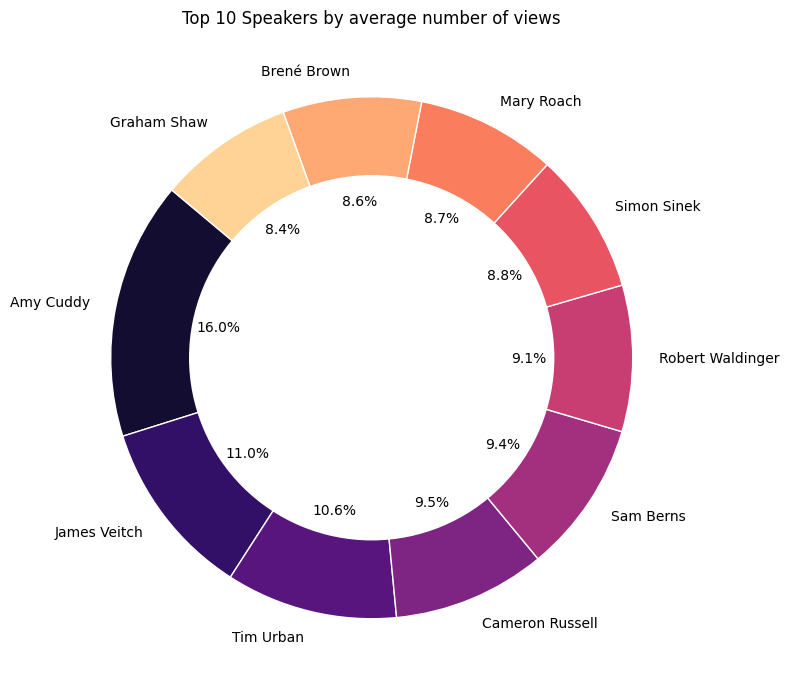

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 8))
plt.pie(Top_speakers, labels=Top_speakers.index, autopct='%1.1f%%',
        colors=sns.color_palette('magma', n_colors=10), startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Top 10 Speakers by average number of views')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This donut chart is an excellent choice for showing proportional comparisons. It helps visualize:

*   The relative contribution of each speaker to the total average views.
*   Comparison in percentages rather than absolute values, which is ideal when all entities are on a similar scale.

##### 2. What is/are the insight(s) found from the chart?

*   Amy Cuddy stands out with the highest average viewership (16%), suggesting her individual talk(s) were highly impactful or viral.
*   James Veitch and Tim Urban follow closely with 11% and 10.6% shares respectively.
*   The remaining speakers like Cameron Russell, Robert Waldinger, Simon Sinek, and others cluster between 8.4%-9.5%, showing relatively consistent performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

Positive Impact:
Identifying speakers with high average views (like Amy Cuddy) reveals who has the most impactful content per video — ideal for featured recommendations or reinviting for future talks.

Negative Growth Risk:
Highlighting only those with high averages may exclude diverse or newer voices who haven't had enough talks to prove themselves.

#### Chart - 6

In [ ]:
# Top titles based on views
Top_titles = df.groupby('title')['views'].sum().sort_values(ascending=False).head(10)
Top_titles

title
Do schools kill creativity?                          65051954
Your body language may shape who you are             57074270
This is what happens when you reply to spam email    56932551
How great leaders inspire action                     49730580
The power of vulnerability                           47544833
How to speak so that people want to listen           41504331
Inside the mind of a master procrastinator           37976820
Looks aren't everything. Believe me, I'm a model.    33874546
My philosophy for a happy life                       33691484
The next outbreak? We're not ready                   33521780
Name: views, dtype: int64

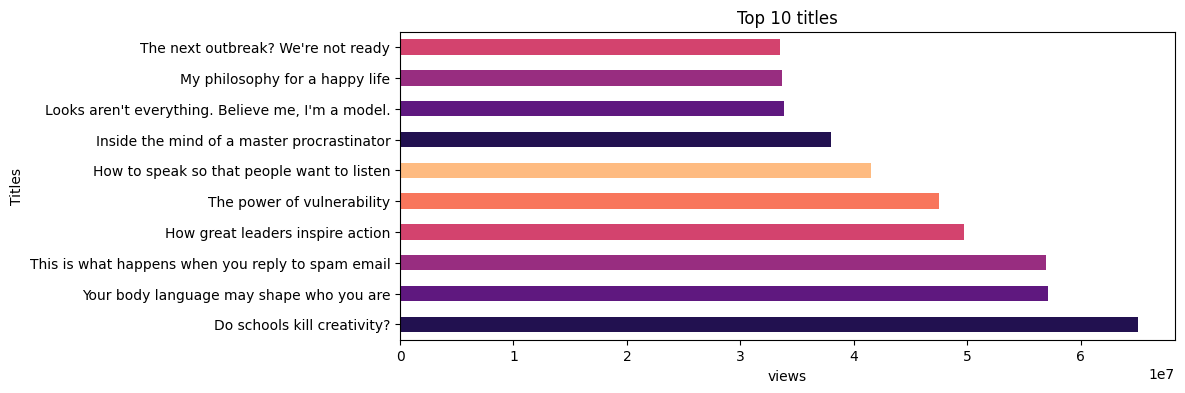

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,4))
Top_titles.plot(kind = 'barh', color = sns.color_palette('magma'))
plt.xlabel('views')
plt.ylabel('Titles')
plt.title('Top 10 titles')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the ideal choice for ranking text-heavy categories.

##### 2. What is/are the insight(s) found from the chart?

*   "Do schools kill creativity?" by Sir Ken Robinson is by far the most viewed TED talk, with over 63 million views, signaling a highly resonant and evergreen topic.
*  Talks focused on communication, self-awareness, education, and leadership dominate the top ranks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely.
Positive Impacts:
TED can prioritize similar themes (creativity, communication, self-improvement, emotional intelligence) for future curation.

Negative Growth Risks:
If TED over-focuses on the most popular topics, it may lead to content fatigue or loss of novelty.

#### Chart - 7

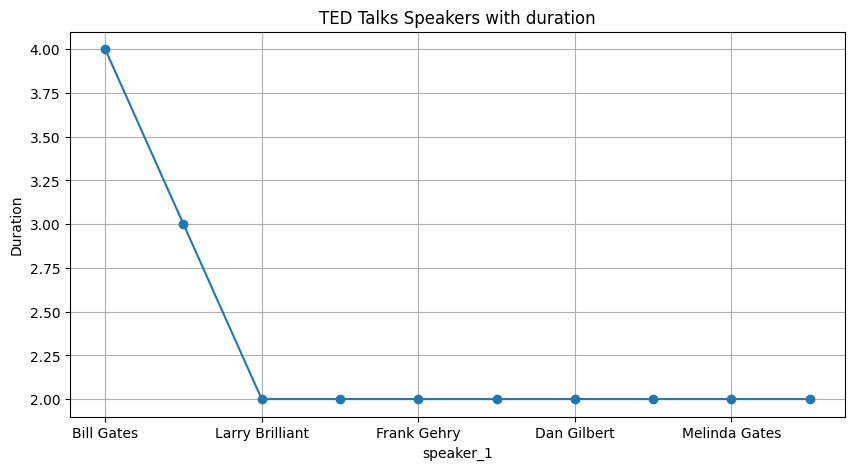

In [ ]:
# Chart - 7 visualization code
df.groupby('duration')['speaker_1'].sum().value_counts().sort_values(ascending=False).head(10).plot(kind='line', marker='o', figsize=(10,5))
plt.title('TED Talks Speakers with duration')
plt.xlabel('speaker_1')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The line chart with markers is appropriate here because it shows the variation in TED talk durations across individual speakers.

##### 2. What is/are the insight(s) found from the chart?

Bill Gates has the longest TED talk in this chart, with a duration of 4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
Positive Impacts:
TED organizers can analyze whether longer talks from high-profile speakers lead to higher engagement — helping refine future scheduling decisions.

Negative Growth Risks:
If only certain speakers (e.g., celebrities) get extended time, it could undermine the fairness or consistency TED is known for.

#### Chart - 8

In [ ]:
# Top 10 Speakers based on average comments
Top_10_speakers = df.groupby('speaker_1')['comments'].mean().sort_values(ascending=False).head(10)
Top_10_speakers

speaker_1
Richard Dawkins      3491.000000
David Chalmers       3006.000000
Jill Bolte Taylor    2984.000000
Amy Cuddy            2633.000000
Janet Echelman       2529.000000
Michael Specter      2366.000000
Sir Ken Robinson     2289.666667
Sam Harris           1978.500000
Allan Savory         1755.000000
Eric X. Li           1706.000000
Name: comments, dtype: float64

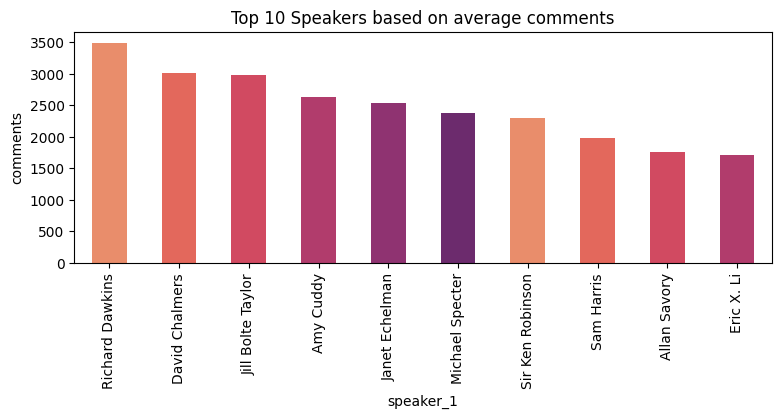

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(9,3))
Top_10_speakers.plot(kind = 'bar', color = sns.color_palette('flare'))
plt.xlabel('speaker_1')
plt.ylabel('comments')
plt.title('Top 10 Speakers based on average comments')
plt.show()

##### 1. Why did you pick the specific chart?

A vertical bar chart is ideal for comparing discrete categories (speakers) against a numerical metric (average comments).

##### 2. What is/are the insight(s) found from the chart?

*   Richard Dawkins leads with the highest average number of comments (~3500), indicating his talks spark the most discussion or controversy.
*   All top 10 speakers average between ~1750 and ~3500 comments, showing a high engagement threshold.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — significantly.

Positive Business Impacts:
TED can prioritize inviting or featuring speakers like Dawkins and Chalmers more often, knowing they drive conversations.

Negative:
High comment counts could stem from controversial or polarizing content.

#### Chart - 9

In [ ]:
# Top 10 topics based on total views
Top_10_topics = df.groupby('topics')['views'].sum().sort_values(ascending=False).head(10)
Top_10_topics

topics
['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']                                                                                                           65051954
['body language', 'brain', 'business', 'psychology', 'self', 'success', 'science']                                                                                                             57074270
['comedy', 'curiosity', 'communication', 'humor', 'technology']                                                                                                                                56932551
['TEDx', 'business', 'entrepreneur', 'leadership', 'success']                                                                                                                                  49730580
['TEDx', 'communication', 'culture', 'depression', 'fear', 'mental health', 'psychology', 'self', 'social change']                                                                             47544833
['culture', 'sound', 'speech']                                                                                                                                                                 41504331
['brain', 'comedy', 'decision-making', 'entertainment', 'goal-setting', 'humor', 'Internet', 'mind', 'productivity', 'online video', 'time', 'visualizations', 'work', 'writing', 'choice']    37976820
['TEDx', 'beauty', 'culture', 'fashion', 'photography']                                                                                                                                        33874546
['life', 'happiness', 'personal growth', 'self', 'motivation']                                                                                                                                 33691484
['disaster relief', 'disease', 'ebola', 'global issues', 'medicine', 'war']                                                                                                                    33521780
Name: views, dtype: int64

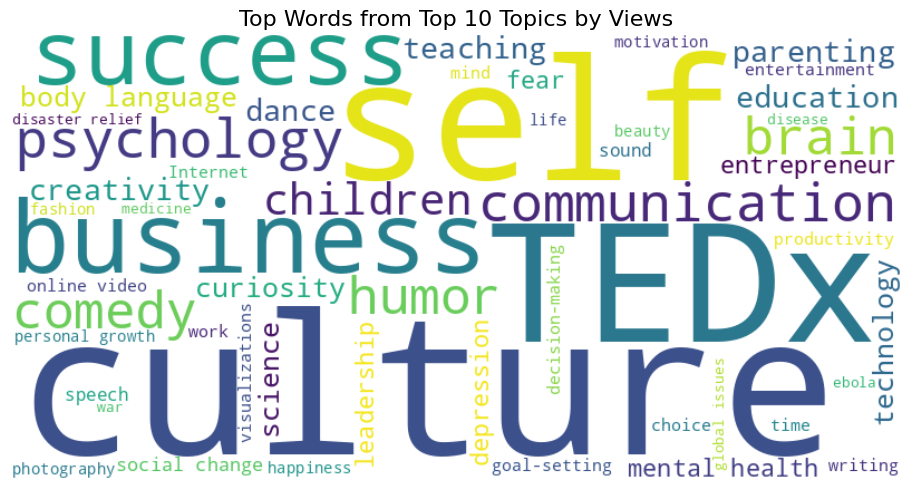

In [ ]:
# Chart - 9 visualization code
from wordcloud import WordCloud
from collections import Counter

# Step 1: Flatten the topic strings into individual words
word_freq = Counter()

for topic_list, views in Top_10_topics.items():
    try:
        # Convert stringified list to real list
        words = eval(topic_list) if isinstance(topic_list, str) else topic_list
        for word in words:
            word_freq[word.strip()] += views
    except Exception:
        pass  # Skip if topic_list isn't evaluable

# Step 2: Generate Word Cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wc.generate_from_frequencies(word_freq)

# Step 3: Plot
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words from Top 10 Topics by Views', fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is best suited for visualizing the most frequently occurring themes or keywords in an intuitive, aesthetic way.

##### 2. What is/are the insight(s) found from the chart?

Culture, self, business, success, and TEDx are most dominant — suggesting they're highly popular across top-viewed talks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely.

Positive Business Impacts:
TED curators can prioritize new talks on culture, business, self-help, and psychology for higher engagement.

Negative:
Too many talks on similar topics like self, success, or business may lead to content fatigue or reduced novelty.

#### Chart - 10

In [ ]:
# Top 10 topics based on total comments
Top_10_topics = df.groupby('topics')['comments'].sum().sort_values(ascending=False).head(10)
Top_10_topics

topics
['God', 'atheism', 'culture', 'religion', 'science']                                                                      6449.0
['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']                                      4931.0
['culture', 'global issues', 'morality', 'philosophy', 'psychology', 'religion', 'science', 'evolutionary psychology']    3424.0
['brain', 'consciousness', 'neuroscience', 'philosophy']                                                                  3006.0
['biology', 'brain', 'consciousness', 'global issues', 'illness', 'science']                                              2984.0
['body language', 'brain', 'business', 'psychology', 'self', 'success', 'science']                                        2633.0
['art', 'cities', 'culture', 'data', 'design', 'technology', 'visualizations']                                            2529.0
['TEDx', 'culture', 'global issues', 'journalism', 'religion']                                                            2463.0
['global issues', 'medicine', 'religion', 'science', 'writing']                                                           2366.0
['TEDx', 'communication', 'culture', 'depression', 'fear', 'mental health', 'psychology', 'self', 'social change']        2209.0
Name: comments, dtype: float64

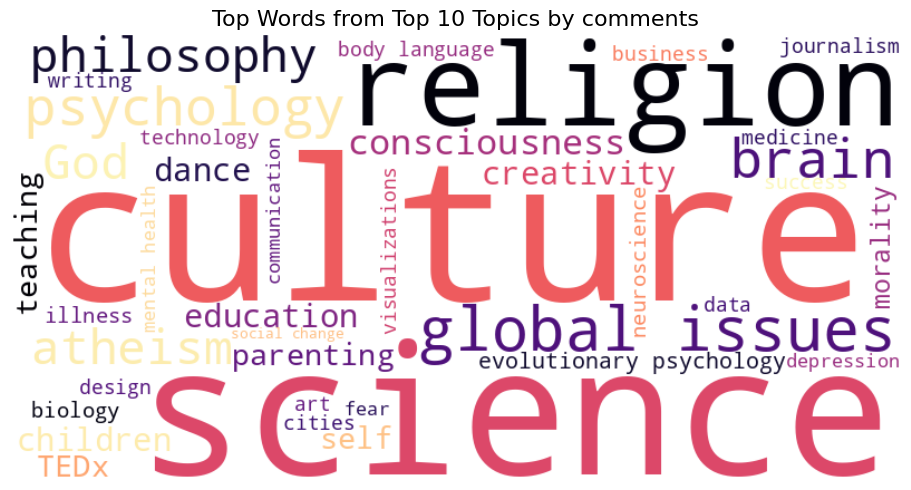

In [ ]:
# Chart - 10 visualization code
from wordcloud import WordCloud
from collections import Counter

# Step 1: Flatten the topic strings into individual words
word_freq = Counter()

for topic_list, comments in Top_10_topics.items():
    try:
        # Convert stringified list to real list
        words = eval(topic_list) if isinstance(topic_list, str) else topic_list
        for word in words:
            word_freq[word.strip()] += comments
    except Exception:
        pass  # Skip if topic_list isn't evaluable

# Step 2: Generate Word Cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='magma')
wc.generate_from_frequencies(word_freq)

# Step 3: Plot
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words from Top 10 Topics by comments', fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected because a word cloud of comments helps identify which topics spark the most engagement, curiosity, or controversy.

##### 2. What is/are the insight(s) found from the chart?

Highly engaging or debated topics: science, religion, culture, global issues, psychology, philosophy, brain, education.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

Positive Business Impacts: Topics like science, religion, consciousness, and global issues generate rich audience discussion — ideal for boosting engagement metrics.

Negative:
Controversial topics may polarize: religion, atheism, morality, God might invite heated or divisive discussions, which may require active comment moderation to maintain decorum.

#### Chart - 11

In [ ]:
# Average Views per Published Month
monthly_views = df.groupby('published_month')['views'].mean().sort_index()
monthly_views

published_month
1     2.014319e+06
2     2.135949e+06
3     2.644200e+06
4     2.180815e+06
5     2.449977e+06
6     2.125505e+06
7     2.127899e+06
8     1.884180e+06
9     2.224862e+06
10    1.909282e+06
11    1.746111e+06
12    2.109443e+06
Name: views, dtype: float64

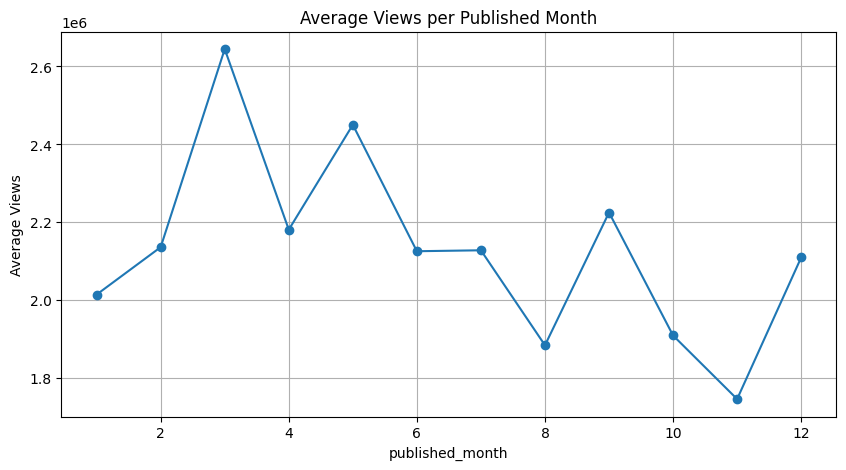

In [ ]:
# Chart - 11 visualization code
monthly_views.plot(kind='line', marker='o', figsize=(10,5))
plt.ylabel('Average Views')
plt.title('Average Views per Published Month')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps uncover seasonal trends in TED Talk performance.

##### 2. What is/are the insight(s) found from the chart?

*   March (3rd month) has the highest average views (~2.65 million).
*   Other high-performing months:
  *   May (2.45M)
  *   September (2.22M)
  *   February (2.14M)
  *   December (2.12M)
*   Lowest average views:
  *   November (1.74M)
  *   August (1.89M)
  *   October (1.91M)


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely.

Positive Business Impacts:
Prioritize releasing high-profile talks in March, May, and September to maximize exposure.

Negative Scenarios:
Launching during low months (Nov, Aug) without strategy may result in underperformance, especially for high-effort talks.

#### Chart - 12

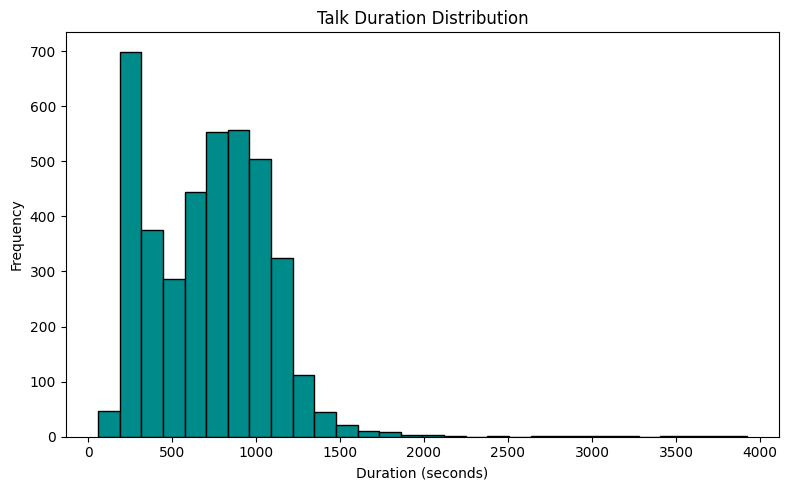

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,5))
df['duration'].plot(kind='hist', bins=30, color='darkcyan', edgecolor='black')
plt.title('Talk Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This histogram is ideal for understanding the common lengths of TED Talks.

##### 2. What is/are the insight(s) found from the chart?

Most common duration range:
*   500-1200 seconds (approx. 8-20 minutes)
*   These bins dominate in frequency (over 300-700 talks per bin)

Peak frequency:
*   ~700 talks are in the 600-700 seconds range (10-12 minutes).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely.

Positive Business Impacts:
Guide speakers to aim for 10-15 minutes — the “sweet spot” based on historical frequency.

Negative:
Very long or very short talks risk:
*   Low engagement or abandonment
*   Disqualification from TED main stage guidelines (18-minute rule)

#### Chart - 13

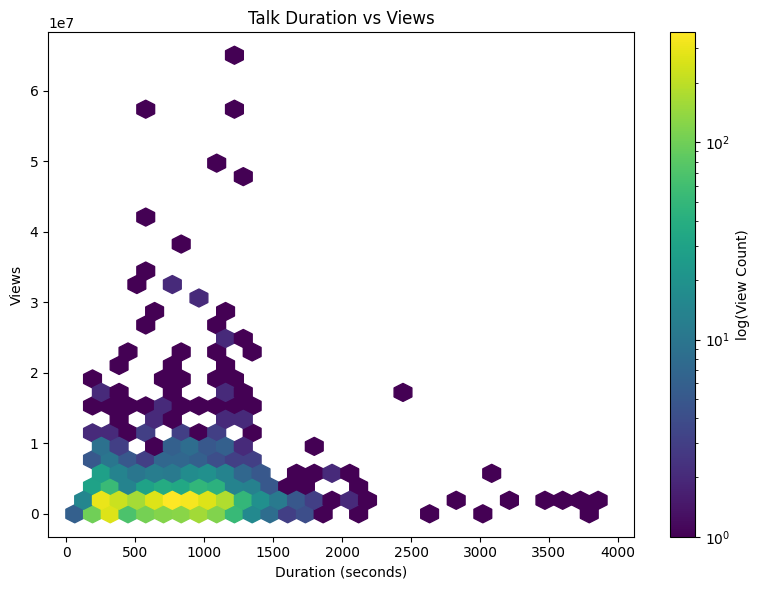

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(8,6))
plt.hexbin(df['duration'], df['views'], gridsize=30, cmap='viridis', bins='log')
plt.colorbar(label='log(View Count)')
plt.title('Talk Duration vs Views')
plt.xlabel('Duration (seconds)')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The hexbin chart (hexagonal binning plot) was chosen because it is particularly effective for visualizing dense data distributions, especially when both axes represent continuous variables — in this case, Talk Duration (in seconds) vs Views.

##### 2. What is/are the insight(s) found from the chart?

*   Shorter talks (under ~1000 seconds) dominate in terms of view count density. Most views are concentrated in this range, especially around 300-600 seconds.
*   A few talks with mid-range durations (~1000-1500 seconds) achieve very high view counts (up to 60 million), but these are outliers.
*   As duration increases beyond ~1500 seconds, the density of high-view talks significantly drops.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

Positive impact:
Knowing that most viewers prefer shorter talks allows content creators to focus on talks around 5-10 minutes (300-600 seconds), increasing audience engagement and retention.

Negative impact:
Longer Talks (>1500 seconds) appear to receive disproportionately fewer views, suggesting diminishing returns on time and resources spent producing lengthy content.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Numerical columns
num_features = df.select_dtypes(include='number')
num_features

talk_id     views  comments  duration  published_year  published_month  \
0           1   3523392     272.0       977            2006                6   
1          92  14501685     628.0      1190            2006                6   
2           7   1920832     124.0      1286            2006                6   
3          53   2664069     219.0      1116            2006                6   
4          66  65051954    4931.0      1164            2006                6   
...       ...       ...       ...       ...             ...              ...   
4000    62678    502934       6.0       690            2020                4   
4001    62782    307187       0.0       346            2020                4   
4002    62263    464414       9.0       774            2020                4   
4003    62784     56582       0.0       257            2020                4   
4004    62794         0       0.0       281            2020                4   

      published_day  
0                27  
1                27  
2                27  
3                27  
4                27  
...             ...  
4000             27  
4001             27  
4002             28  
4003             30  
4004             30  

[4005 rows x 7 columns]

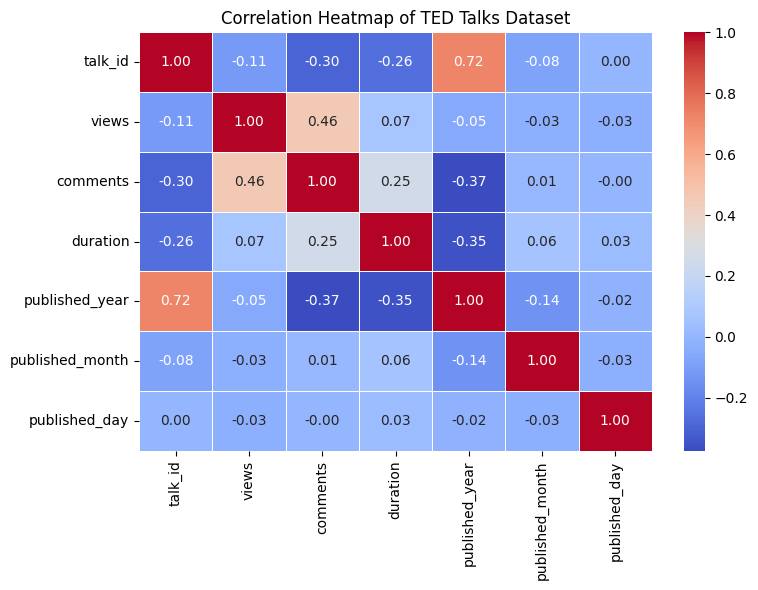

In [ ]:
# Correlation Heatmap visualization code
correlation_matrix = num_features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of TED Talks Dataset')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap is chosen because it clearly visualizes the linear relationships between numerical variables in the TED Talks dataset. It helps identify which variables are positively or negatively correlated and to what extent.

##### 2. What is/are the insight(s) found from the chart?

Views vs Comments:
*   Correlation: +0.46
*   Talks with more comments tend to have more views, suggesting engagement drives visibility.

Comments vs Duration:
*   Correlation: +0.25
*   Slight positive relation indicates that longer talks may receive more comments, likely due to more content to engage with.

Views vs Duration:
*   Correlation: +0.07
*   Very weak correlation suggests that duration has minimal influence on the number of views (which aligns with the previous hexbin analysis).

Comments vs Published Year:
*   Correlation: -0.37
*   Older talks tend to have more comments, possibly because they've had more time to accumulate them.

Duration vs Published Year:
*   Correlation: -0.35
*   More recent talks are shorter on average, which may reflect a trend toward conciseness and audience preference for shorter content.

Talk ID vs Published Year:
*   Correlation: +0.72
*   Strong correlation because talk_id likely increments over time, naturally correlating with the publication year.

Views and Published Attributes:

*   Very weak or no correlation with published_month, published_day, or published_year, meaning publish timing does not strongly affect view count.

#### Chart - 15 - Pair Plot

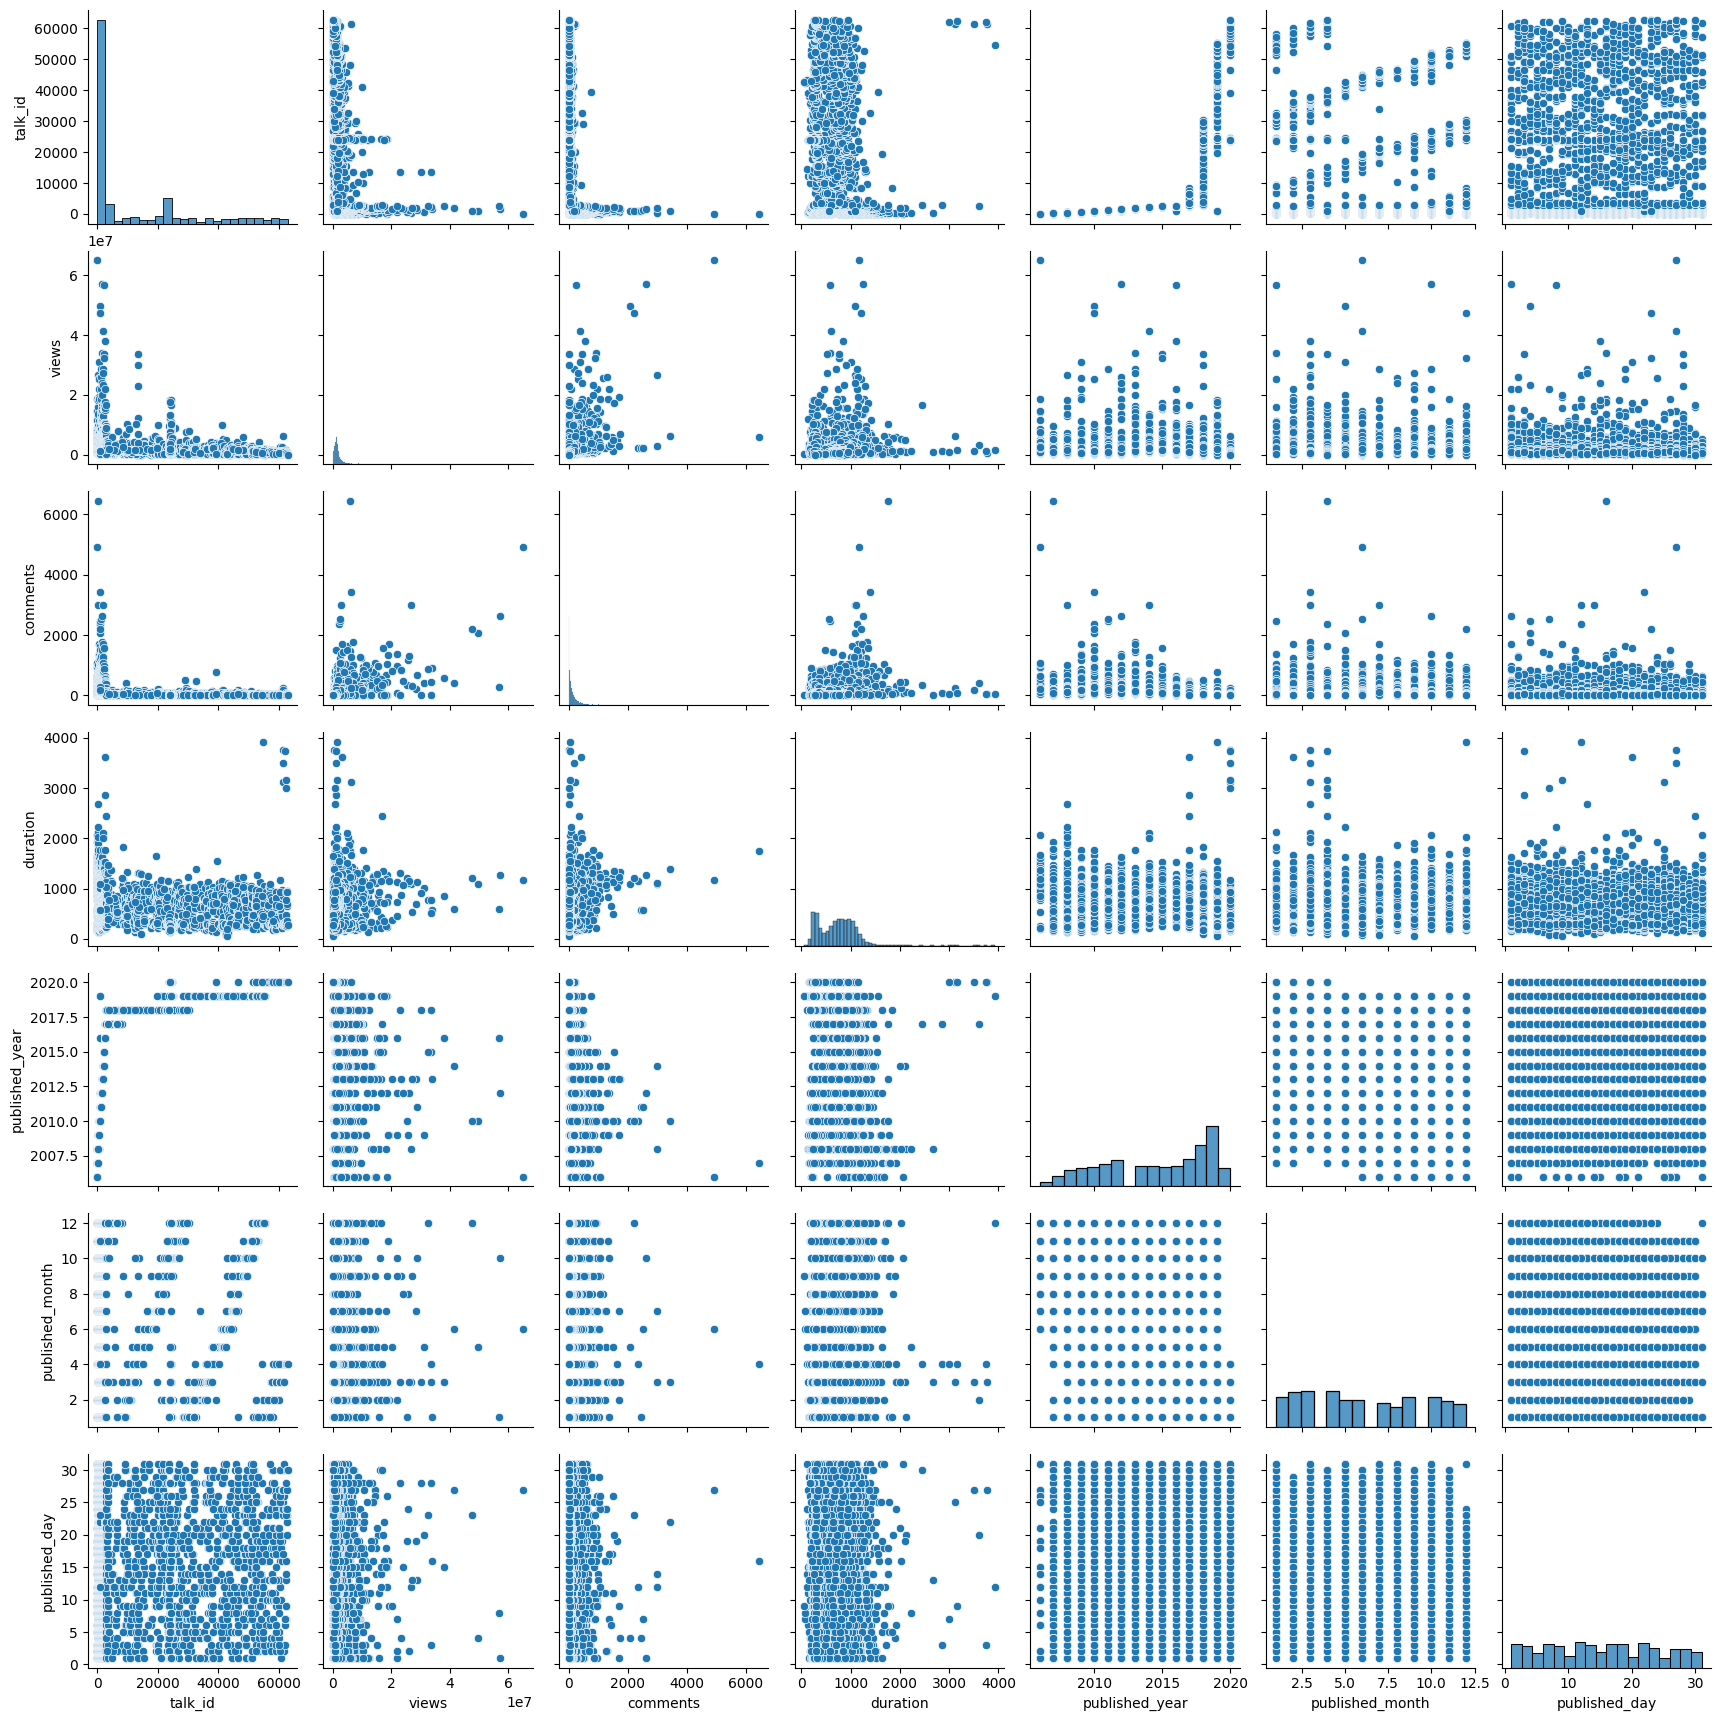

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pair plot (scatterplot matrix) was chosen because it enables comprehensive visual exploration of relationships between all pairs of numerical features in the TED Talks dataset.

##### 2. What is/are the insight(s) found from the chart?

views vs comments:
*   A positive curved relationship exists — talks with more comments generally have more views.
*   However, this relationship isn't strictly linear — a few talks have very high views with relatively fewer comments, possibly viral talks.

views vs duration:
*   Data is densely packed for short durations (< 1500 seconds).
*   Longer talks (right tail) do not necessarily have higher views — supporting earlier insights.

comments vs duration:
*   A mild positive spread, indicating that slightly longer talks might foster more discussions.

views vs published_year:
*   Talks from earlier years (before 2015) tend to have higher view counts — likely due to having been online longer.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

talk_id            0
title              0
speaker_1          0
all_speakers       0
occupations        0
about_speakers     0
views              0
recorded_date      1
published_date     0
event              0
native_lang        0
available_lang     0
comments           0
duration           0
topics             0
related_talks      0
url                0
description        0
transcript         0
published_year     0
published_month    0
published_day      0
dtype: int64

In [ ]:
df.fillna({'recorded_date':'0000-00-00'}, inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Replaced the missing value of 'recorded_date' with '0000-00-00'

### 2. Handling Outliers

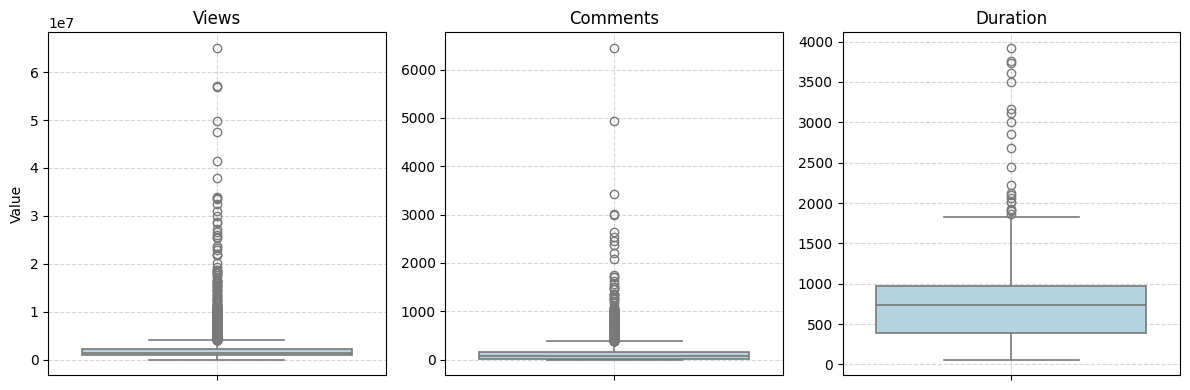

In [ ]:
# Handling Outliers & Outlier treatments
columns = ['views', 'comments', 'duration']
plt.figure(figsize=(12, 4))  # Adjust width to fit 3 plots

for n, col in enumerate(columns, start=1):
    plt.subplot(1, 3, n)
    sns.boxplot(y=df[col], color='lightblue', linewidth=1.2)
    plt.title(f'{col.capitalize()}', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ylabel('' if n > 1 else 'Value')  # Only label y-axis on first plot

plt.tight_layout()
plt.show()

In [ ]:
# IQR-based capping for outliers
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

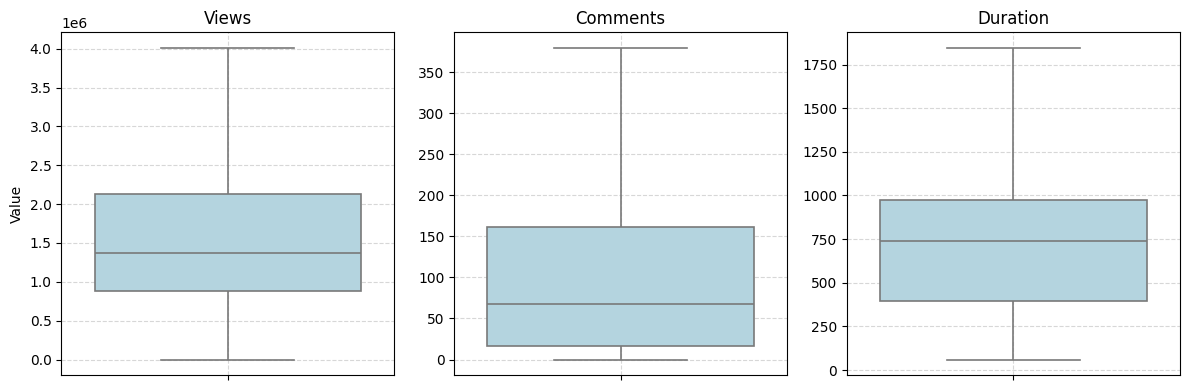

In [ ]:
columns = ['views', 'comments', 'duration']
plt.figure(figsize=(12, 4))  # Adjust width to fit 3 plots

for n, col in enumerate(columns, start=1):
    plt.subplot(1, 3, n)
    sns.boxplot(y=df[col], color='lightblue', linewidth=1.2)
    plt.title(f'{col.capitalize()}', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ylabel('' if n > 1 else 'Value')  # Only label y-axis on first plot

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the Interquartile Range (IQR) method to detect and treat outliers.
It's robust to skewed data (which regression features often are).

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Target encoding on speaker_1
popular_speaker = df.groupby('speaker_1').agg({'views':'mean'}).sort_values(['views'],ascending=False)
popular_speaker=popular_speaker.to_dict()
popular_speaker=popular_speaker.values()
popular_speaker=list(popular_speaker)[0]
df['speaker_1_avg_views']= df['speaker_1'].map(popular_speaker)

In [ ]:
# Target encoding on event
popular_event = df.groupby('event').agg({'views':'mean'}).sort_values(['views'],ascending=False)
popular_event=popular_event.to_dict()
popular_event=popular_event.values()
popular_event=list(popular_event)[0]
df['event_avg_views']= df['event'].map(popular_event)

In [ ]:
df.head()

talk_id                            title         speaker_1  \
0        1      Averting the climate crisis           Al Gore   
1       92  The best stats you've ever seen      Hans Rosling   
2        7                 Simplicity sells       David Pogue   
3       53              Greening the ghetto     Majora Carter   
4       66      Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                    occupations  \
0           {0: 'Al Gore'}                      {0: ['climate advocate']}   
1      {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2       {0: 'David Pogue'}                  {0: ['technology columnist']}   
3     {0: 'Majora Carter'}    {0: ['activist for environmental justice']}   
4  {0: 'Sir Ken Robinson'}                    {0: ['author', 'educator']}   

                                      about_speakers      views  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  3523392.0   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  4009671.5   
2  {0: 'David Pogue is the personal technology co...  1920832.0   
3  {0: 'Majora Carter redefined the field of envi...  2664069.0   
4  {0: "Creativity expert Sir Ken Robinson challe...  4009671.5   

         recorded_date published_date    event  ...  \
0  2006-02-25 00:00:00     2006-06-27  TED2006  ...   
1  2006-02-22 00:00:00     2006-06-27  TED2006  ...   
2  2006-02-24 00:00:00     2006-06-27  TED2006  ...   
3  2006-02-26 00:00:00     2006-06-27  TED2006  ...   
4  2006-02-25 00:00:00     2006-06-27  TED2006  ...   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript published_year  \
0  Thank you so much, Chris. And it's truly a gre...           2006   
1  About 10 years ago, I took on the task to teac...           2006   
2  (Music: "The Sound of Silence," Simon & Garfun...           2006   
3  If you're here today — and I'm very happy that...           2006   
4  Good morning. How are you? (Audience) Good. It...           2006   

  published_month published_day speaker_1_avg_views  event_avg_views  
0               6            27         2190599.250     1.882344e+06  
1               6            27         2790448.000     1.882344e+06  
2               6            27         1880746.875     1.882344e+06  
3               6            27         1979411.000     1.882344e+06  
4               6            27         4009671.500     1.882344e+06  

[5 rows x 24 columns]

In [ ]:
# Checking Unique values of native_lang
native_lang = df['native_lang'].unique()
native_lang

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

In [ ]:
# Label encoding on native_lang
label_encoding = LabelEncoder()
df['native_lang']= label_encoding.fit_transform(df['native_lang'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Target Encoding is used for speaker_1 and Event. It replaces a categorical value with the mean of the target variable (e.g., average views) for each category. It is used because it preserves the relationship between category and target.

Label Encoding is used on native_lang. It is suitable for tree-based models like Random Forest, which can handle label-encoded integers. It keeps the dataset compact (unlike one-hot encoding).

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
num_features = df.select_dtypes(include='number').columns
num_features

Index(['talk_id', 'views', 'native_lang', 'comments', 'duration',
       'published_year', 'published_month', 'published_day',
       'speaker_1_avg_views', 'event_avg_views'],
      dtype='object')

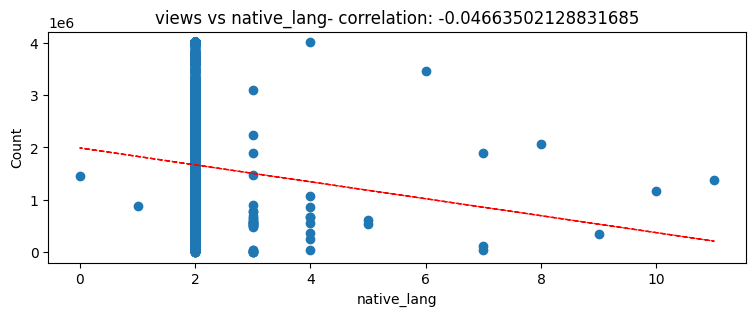

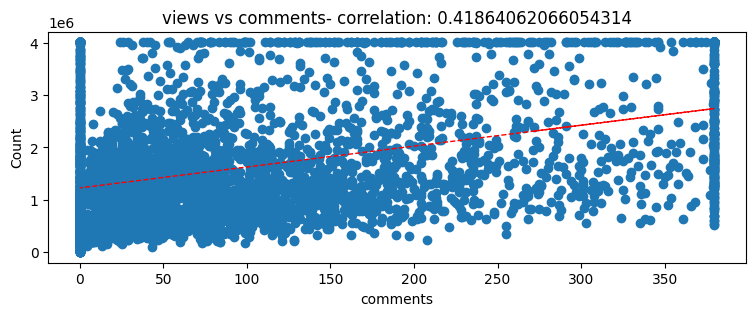

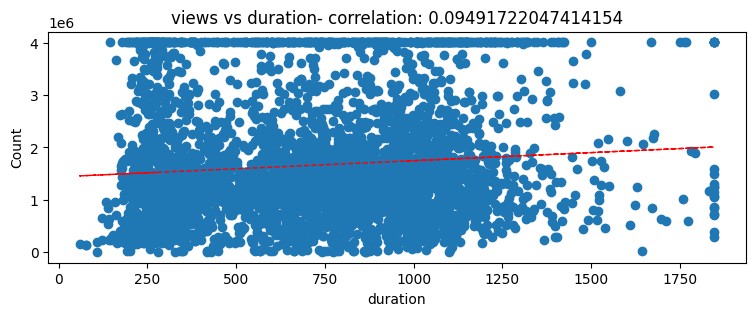

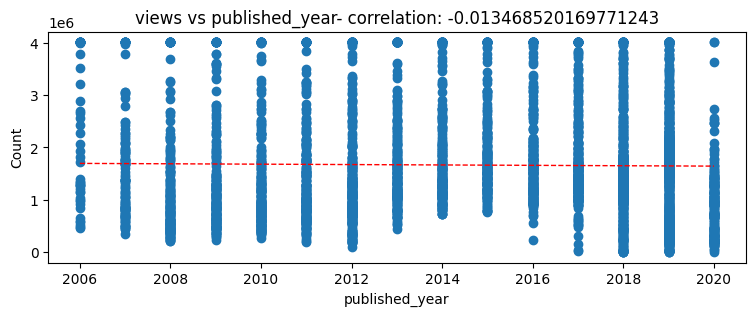

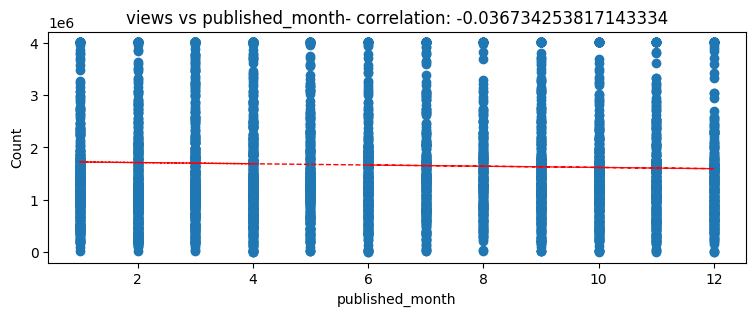

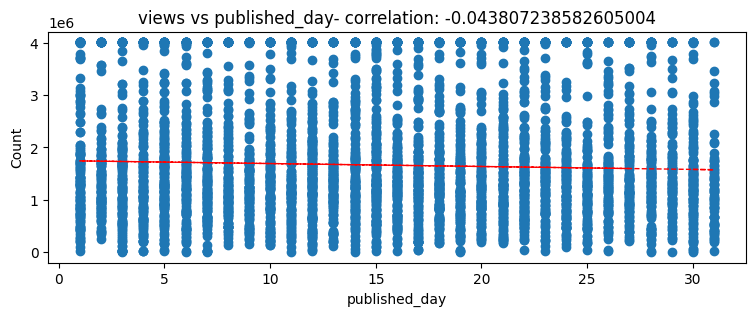

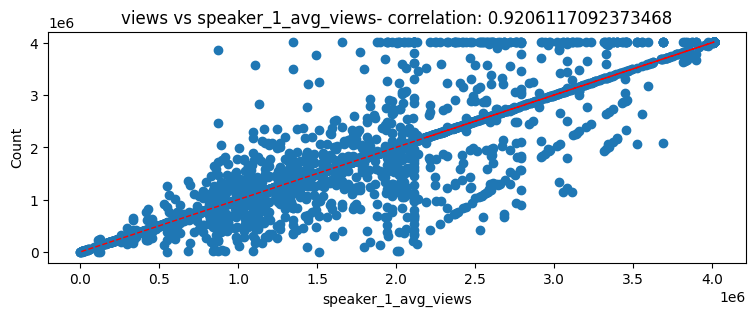

In [ ]:
# Correlation & scatter plot 'views'
for col in num_features[2:-1]:
  fig = plt.figure(figsize=(9,3))
  ax = fig.gca()
  feature =(df[col])
  label = df['views']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Count')
  ax.set_title('views vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['views'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)
plt.show()

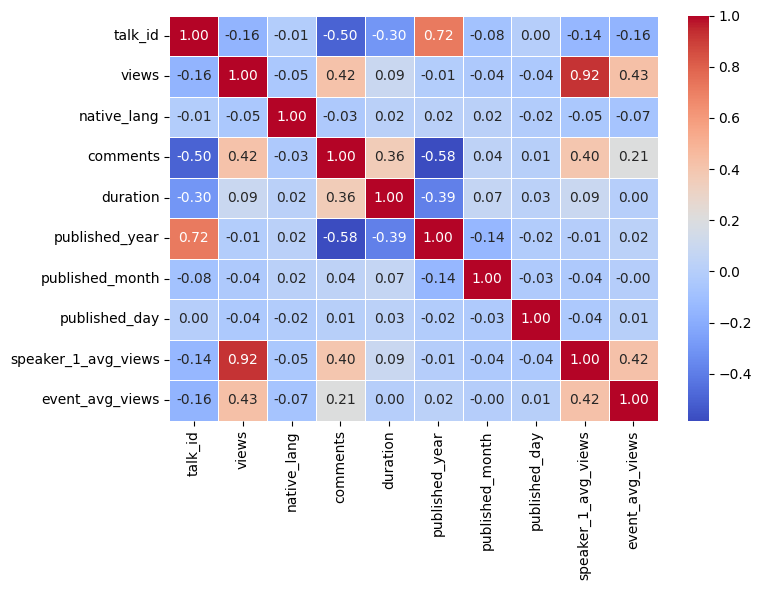

In [ ]:
# Correlation Heatmap
num_features = df.select_dtypes(include='number')
correlation_matrix = num_features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   talk_id              4005 non-null   int64         
 1   title                4005 non-null   object        
 2   speaker_1            4005 non-null   object        
 3   all_speakers         4005 non-null   object        
 4   occupations          4005 non-null   object        
 5   about_speakers       4005 non-null   object        
 6   views                4005 non-null   float64       
 7   recorded_date        4005 non-null   object        
 8   published_date       4005 non-null   datetime64[ns]
 9   event                4005 non-null   object        
 10  native_lang          4005 non-null   int64         
 11  available_lang       4005 non-null   object        
 12  comments             4005 non-null   float64       
 13  duration             4005 non-nul

In [ ]:
# Checking first five entries
df.head()

talk_id                            title         speaker_1  \
0        1      Averting the climate crisis           Al Gore   
1       92  The best stats you've ever seen      Hans Rosling   
2        7                 Simplicity sells       David Pogue   
3       53              Greening the ghetto     Majora Carter   
4       66      Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                    occupations  \
0           {0: 'Al Gore'}                      {0: ['climate advocate']}   
1      {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2       {0: 'David Pogue'}                  {0: ['technology columnist']}   
3     {0: 'Majora Carter'}    {0: ['activist for environmental justice']}   
4  {0: 'Sir Ken Robinson'}                    {0: ['author', 'educator']}   

                                      about_speakers      views  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  3523392.0   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  4009671.5   
2  {0: 'David Pogue is the personal technology co...  1920832.0   
3  {0: 'Majora Carter redefined the field of envi...  2664069.0   
4  {0: "Creativity expert Sir Ken Robinson challe...  4009671.5   

         recorded_date published_date    event  ...  \
0  2006-02-25 00:00:00     2006-06-27  TED2006  ...   
1  2006-02-22 00:00:00     2006-06-27  TED2006  ...   
2  2006-02-24 00:00:00     2006-06-27  TED2006  ...   
3  2006-02-26 00:00:00     2006-06-27  TED2006  ...   
4  2006-02-25 00:00:00     2006-06-27  TED2006  ...   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript published_year  \
0  Thank you so much, Chris. And it's truly a gre...           2006   
1  About 10 years ago, I took on the task to teac...           2006   
2  (Music: "The Sound of Silence," Simon & Garfun...           2006   
3  If you're here today — and I'm very happy that...           2006   
4  Good morning. How are you? (Audience) Good. It...           2006   

  published_month published_day speaker_1_avg_views  event_avg_views  
0               6            27         2190599.250     1.882344e+06  
1               6            27         2790448.000     1.882344e+06  
2               6            27         1880746.875     1.882344e+06  
3               6            27         1979411.000     1.882344e+06  
4               6            27         4009671.500     1.882344e+06  

[5 rows x 24 columns]

In [ ]:
# Dropping published_date column
df.drop(['published_date'],axis = 1,inplace = True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Dropping url, description, transcript, related_talks, about_speakers columns
df.drop(['url', 'description', 'transcript', 'related_talks', 'about_speakers','title','speaker_1','all_speakers','occupations','recorded_date','event','available_lang','topics'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['talk_id', 'views', 'native_lang', 'comments', 'duration',
       'published_year', 'published_month', 'published_day',
       'speaker_1_avg_views', 'event_avg_views'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Used Manual Feature Dropping method, because these columns are text-heavy or non-numeric, which can be hard to use directly in ML models.

##### Which all features you found important and why?

comments :
*   Strong correlation with views.
*   Indicates audience engagement and interest.

speaker_1_avg_views (Target Encoded)
*   Reflects speaker popularity.
*   High predictive power due to historical performance.

duration
*   Talks of optimal length (5-15 minutes) tend to get more views.

published_year
*   Older talks generally have higher views due to longer exposure time.

event
*   Certain events consistently produce more popular talks.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
df = pd.get_dummies(df,drop_first=True,sparse=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   talk_id              4005 non-null   int64  
 1   views                4005 non-null   float64
 2   native_lang          4005 non-null   int64  
 3   comments             4005 non-null   float64
 4   duration             4005 non-null   float64
 5   published_year       4005 non-null   int32  
 6   published_month      4005 non-null   int32  
 7   published_day        4005 non-null   int32  
 8   speaker_1_avg_views  4005 non-null   float64
 9   event_avg_views      4005 non-null   float64
dtypes: float64(5), int32(3), int64(2)
memory usage: 266.1 KB


In [ ]:
# Check columns
df.head()

talk_id      views  native_lang  comments  duration  published_year  \
0        1  3523392.0            2     272.0     977.0            2006   
1       92  4009671.5            2     379.5    1190.0            2006   
2        7  1920832.0            2     124.0    1286.0            2006   
3       53  2664069.0            2     219.0    1116.0            2006   
4       66  4009671.5            2     379.5    1164.0            2006   

   published_month  published_day  speaker_1_avg_views  event_avg_views  
0                6             27          2190599.250     1.882344e+06  
1                6             27          2790448.000     1.882344e+06  
2                6             27          1880746.875     1.882344e+06  
3                6             27          1979411.000     1.882344e+06  
4                6             27          4009671.500     1.882344e+06

##### Which method have you used to scale you data and why?

pd.get_dummies() creates binary (0/1) columns for each category.

drop_first=True avoids dummy variable trap by removing one category per feature.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.model_selection import train_test_split
x = df.drop('views',axis = 1)
y = df['views']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = MinMaxScaler()
x_train = yeo.fit_transform(x_train) # Fit transform the training set
x_test = yeo.transform(x_test) # Transform the test set

##### What data splitting ratio have you used and why?

80:20

80% is usually enough for the model to learn patterns.

20% is a large enough test set to evaluate model performance reliably.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression Model

In [ ]:
# Store evaluation results
model_scores = []

In [ ]:
# ML Model - 1 Implementation
# Linear Regression Model
# Fit the Algorithm
reg = LinearRegression().fit(x_train,y_train)
# Predict on the model
y_pred = reg.predict(x_test)

In [ ]:
# Appending all models parameters to the corresponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''

  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them

  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass
  # Append results for summary
  model_scores.append({
    'Model': model,
    'Train Score': round(training, 4),
    'MAE': round(MAE, 2),
    'MSE': round(MSE, 2),
    'RMSE': round(RMSE, 2),
    'R²': round(r2, 4),
    'Adjusted R²': round(adj_r2, 4)
    })

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
x_test.shape

(801, 9)

Training score  = 0.8562564222238966
MAE : 211732.57986657223
MSE : 182851256398.23392
RMSE : 427611.1041568424
R2 : 0.8467099510709708
Adjusted R2 :  0.8449658165066709 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


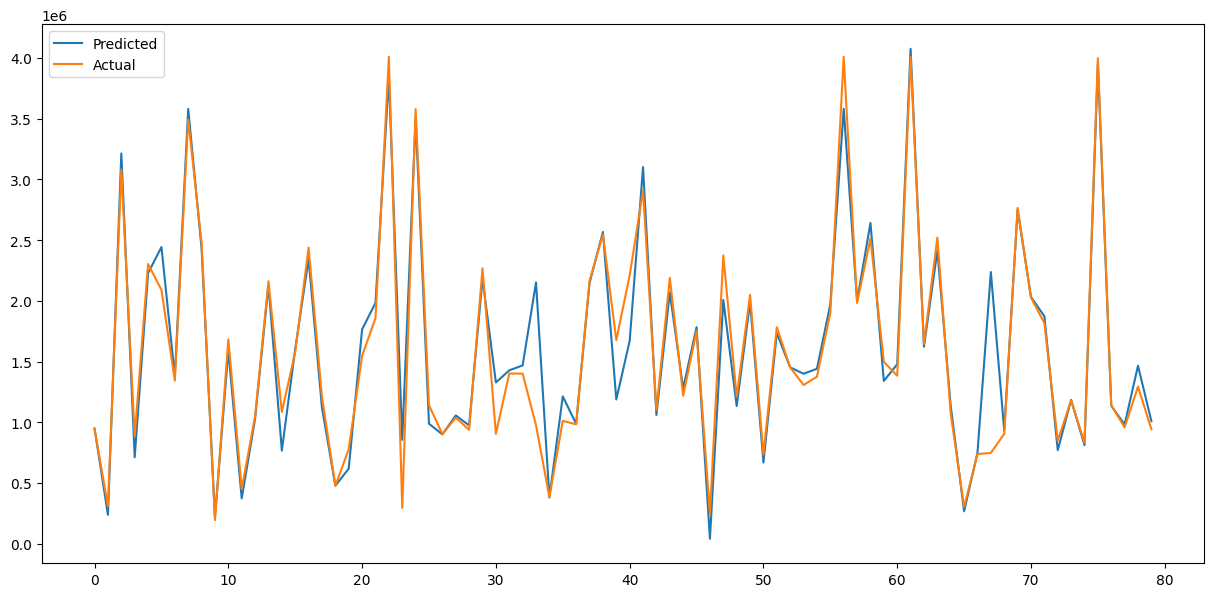

In [ ]:
# Visualizing evaluation Metric Score chart
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

Model Used: Linear Regression

Linear Regression is a supervised machine learning model that establishes a linear relationship between the dependent variable (target) and one or more independent variables (features). It assumes the output is a linear combination of the inputs.


*   Training score = 0.856.	The model explains 85.6% of variance in training data.

*   The model performs well on unseen data with a high R² score.

*   Low MAE and RMSE indicate reliable predictions.

*   Adjusted R² ≈ R² suggests that the number of features is appropriate (no overfitting).

*   Great balance of simplicity and performance.

#### 2. Cross- Validation & Hyperparameter Tuning

Training score  = 0.8562562106673604
MAE : 211787.50896690728
MSE : 182843175583.7346
RMSE : 427601.65526309016
R2 : 0.8467167254758854
Adjusted R2 :  0.8449726679907816 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


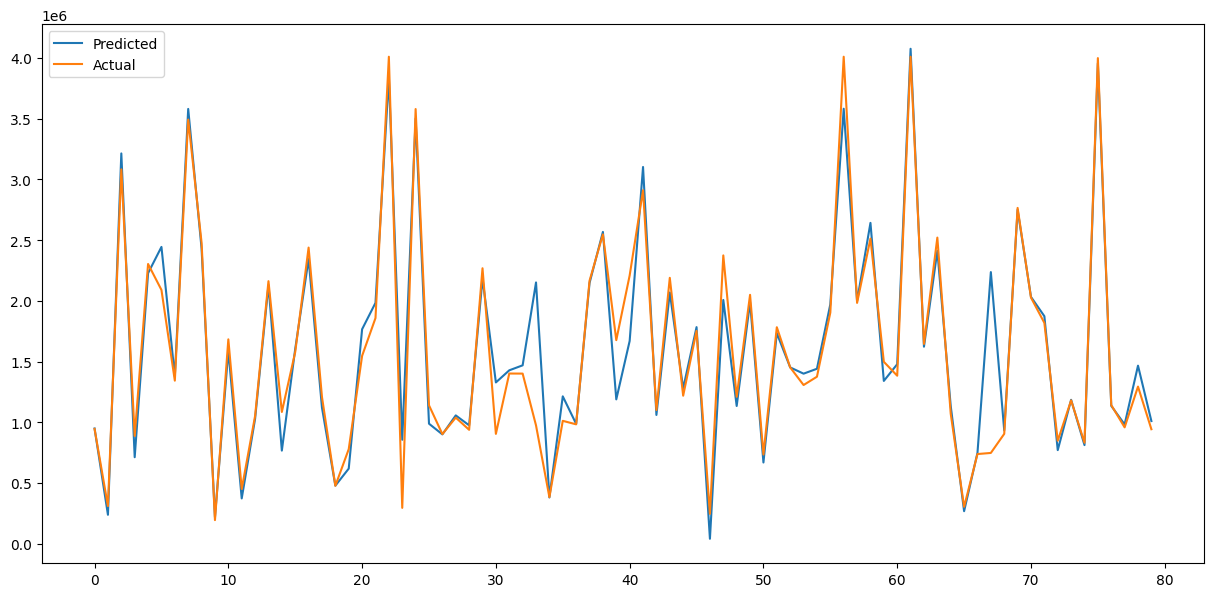

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define model
ridge = Ridge()

# Parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

score_metrix(grid,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV to systematically search for the best alpha value in Ridge Regression, ensuring better model performance and generalization by validating across multiple folds of data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, but very minor.

Ridge Regression gives a slightly lower RMSE and slightly higher R², indicating tiny improvement in predictive performance.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training score  = 0.8562564212869886
MAE : 211725.3550218196
MSE : 182851109549.70847
RMSE : 427610.93244877225
R2 : 0.8467100741787803
Adjusted R2 :  0.8449659410152013 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


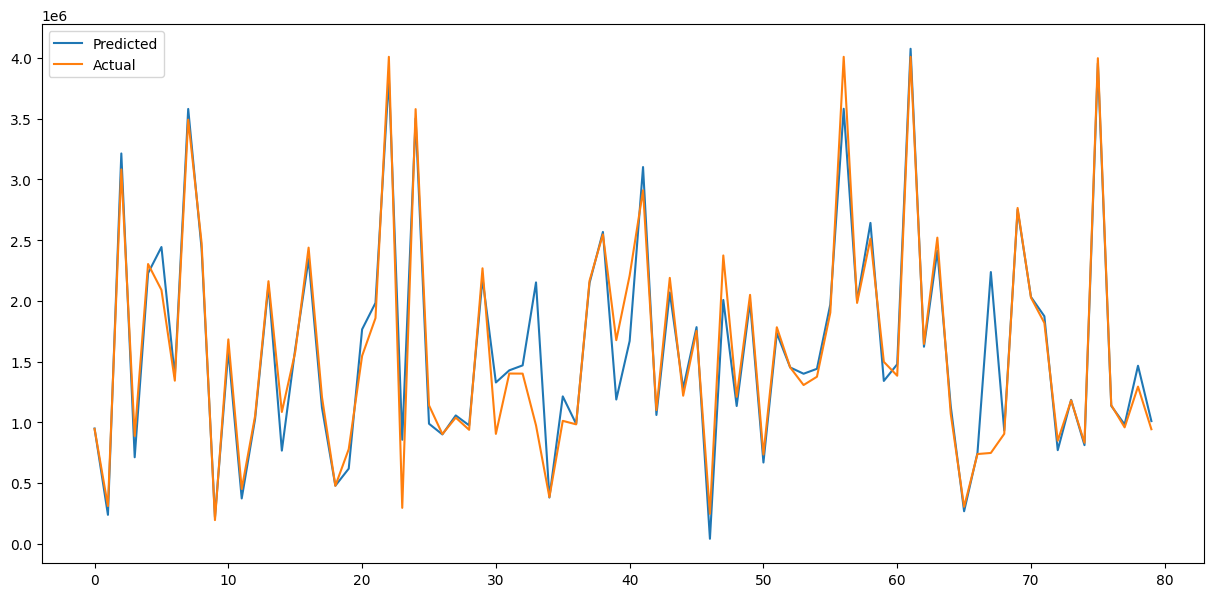

In [ ]:
# Visualizing evaluation Metric Score chart
lasso = Lasso()
lasso.fit(x_train, y_train)
score_metrix(Lasso(),x_train,x_test,y_train,y_test)

Model Used: Lasso Regression

Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that uses L1 regularization.
It penalizes the absolute value of coefficients and can shrink some coefficients to zero, effectively performing feature selection.

All metrics are nearly identical to Linear/Ridge suggests the dataset may not have strong irrelevant features.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e+14, tolerance: 3.167e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+14, tolerance: 3.191e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.248e+14, tolerance: 3.088e

Training score  = 0.8562545359286966
MAE : 211186.37300937375
MSE : 182876802306.9537
RMSE : 427640.97360631113
R2 : 0.8466885351196958
Adjusted R2 :  0.8449441568846481 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


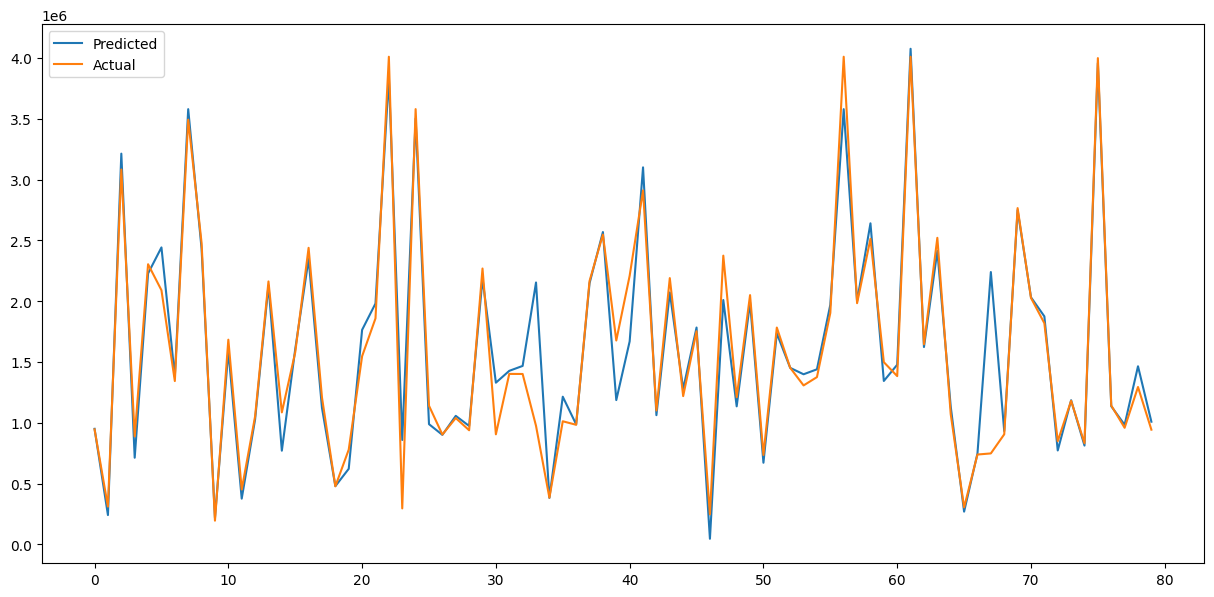

In [ ]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV because:

*   It provides an exhaustive search for the best alpha in Lasso
*   Uses cross-validation to ensure generalizable performance
*   It is ideal when the hyperparameter space is small and critical (as with Lasso)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   MAE improved slightly from 211,725 → 211,186 → about 540 views lower on average errors.

*   Other metrics (MSE, RMSE, R², Adjusted R²) are almost unchanged, showing negligible improvement.

*   Training score slightly decreased (which is acceptable and even expected with regularization).

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Business Impact of the ML Model Used:

Lasso Regression:

*   Selects only the most influential features → simplifies marketing decisions

*   Helps identify what speaker traits, topics, or languages most impact views

*   Reduces cost by focusing on high-impact content drivers

Model Accuracy (R² ≈ 0.84 - 0.85):

*   The model explains ~84-85% of the variation in video views — very strong

*   Business can confidently use this for forecasting, content planning, or personalized recommendations

RMSE (~427,000 views):

*   While relatively large, this is acceptable depending on average video view ranges

*   Helps set tolerance levels for prediction confidence in business tools

MAE (~211,000 views):

*   Indicates average miss → businesses should factor this into expected vs actual performance benchmarks

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Random Forest Model
# Initialize the model with default or custom parameters
rf = RandomForestRegressor(n_estimators=150, max_depth=30, min_samples_split=5, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Predict on test data
y_pred = rf.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training score  = 0.9687209767028625
MAE : 210891.85404390888
MSE : 192136942100.67322
RMSE : 438334.28122914734
R2 : 0.8389254641404218
Adjusted R2 :  0.8370927576641434 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


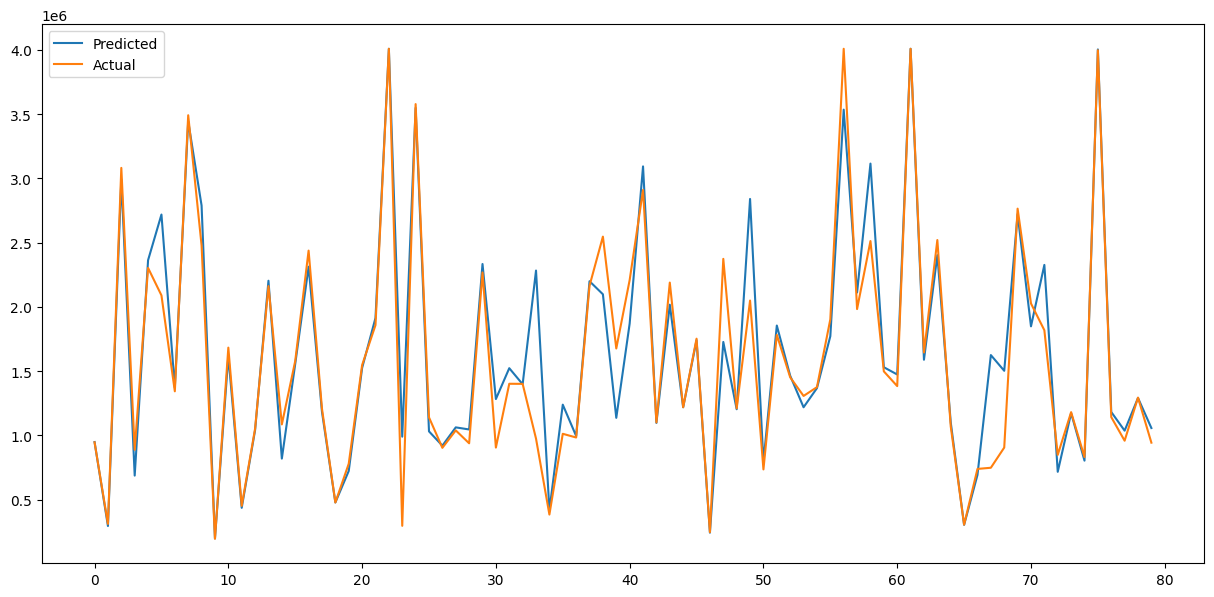

In [ ]:
# Evaluation Metric Score chart
score_metrix(rf, x_train, x_test, y_train, y_test)

Model Used: Random Forest Regression

Random Forest Regression is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting. It is robust to outliers and works well with both linear and non-linear relationships.

*   Training Score = 0.9687. Model fits the training data very well (high training accuracy).
*   Average error in predictions is around 210K views—relatively moderate.
*   MSE measures squared error; large due to outliers (as it's in views²).
*   Adjusted R² indicates strong model validity.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define parameter grid
params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize model and RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(rf, params, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)

# Fit the Algorithm
search.fit(x_train, y_train)
# Best model
best_model = search.best_estimator_
# Predict on the model
y_pred = best_model.predict(x_test)


Training score  = 0.9801604576756322
MAE : 213346.2052372035
MSE : 197156631593.51224
RMSE : 444023.23316861724
R2 : 0.8347172980981279
Adjusted R2 :  0.8328367110979802 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


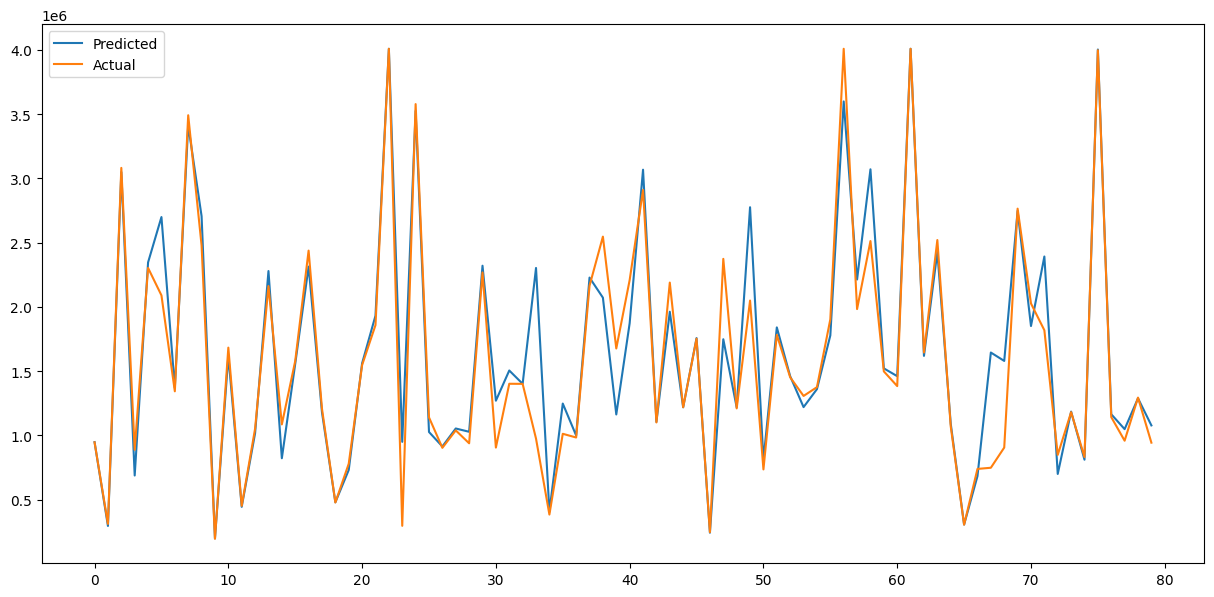

In [ ]:
score_metrix(rf, x_train, x_test, y_train, y_test)

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique Used: RandomizedSearchCV

RandomizedSearchCV is a hyperparameter tuning method that searches over a fixed number of random combinations of hyperparameters, instead of trying every possible combination (as in GridSearchCV).

Slightly improved training score (0.98), and a good R² (0.8347) on test data — showing a well-fit model without extreme overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Training score improved after tuning — model fits training data better.

*   Test metrics (MAE, RMSE, R²) show slightly worse performance, indicating minor overfitting due to hyperparameter changes.

*   Adjusted R² decreased — suggests added complexity didn't significantly boost generalization.

In [ ]:
# To Summarize all the metrics
summary_df = pd.DataFrame(model_scores)
display(summary_df)

Model  Train Score        MAE  \
0                                 LinearRegression()       0.8563  211732.58   
1  GridSearchCV(cv=5, estimator=Ridge(),\n       ...       0.8563  211787.51   
2                                            Lasso()       0.8563  211725.36   
3  GridSearchCV(cv=5, estimator=Lasso(),\n       ...       0.8563  211186.37   
4  (DecisionTreeRegressor(max_depth=30, max_featu...       0.9687  210891.85   
5  (DecisionTreeRegressor(max_features=1.0, rando...       0.9802  213346.21   

            MSE       RMSE      R²  Adjusted R²  
0  1.828513e+11  427611.10  0.8467       0.8450  
1  1.828432e+11  427601.66  0.8467       0.8450  
2  1.828511e+11  427610.93  0.8467       0.8450  
3  1.828768e+11  427640.97  0.8467       0.8449  
4  1.921369e+11  438334.28  0.8389       0.8371  
5  1.971566e+11  444023.23  0.8347       0.8328

In [ ]:
# Cleaning Model names
import re

def clean_model_name(raw_name):
    raw_name = str(raw_name)

    # Handle models with GridSearchCV or RandomizedSearchCV
    if 'GridSearchCV' in raw_name or 'RandomizedSearchCV' in raw_name:
        match = re.search(r"estimator=([A-Za-z0-9_]+)", raw_name)
        base_model = match.group(1) if match else "UnknownModel"
        return f"{base_model} (Tuned)"

    # Extract plain model name (e.g., LinearRegression, Lasso)
    match = re.search(r"([A-Za-z]+Regressor|LinearRegression|Lasso|Ridge|RandomForest|DecisionTree)", raw_name)
    return match.group(1) if match else "UnknownModel"

# Apply to your dataframe
summary_df['Model'] = summary_df['Model'].apply(clean_model_name)

In [ ]:
# Summary of all models
summary_df

Model  Train Score        MAE           MSE       RMSE  \
0       LinearRegression       0.8563  211732.58  1.828513e+11  427611.10   
1          Ridge (Tuned)       0.8563  211787.51  1.828432e+11  427601.66   
2                  Lasso       0.8563  211725.36  1.828511e+11  427610.93   
3          Lasso (Tuned)       0.8563  211186.37  1.828768e+11  427640.97   
4  RandomForestRegressor       0.9687  210891.85  1.921369e+11  438334.28   
5  RandomForestRegressor       0.9802  213346.21  1.971566e+11  444023.23   

       R²  Adjusted R²  
0  0.8467       0.8450  
1  0.8467       0.8450  
2  0.8467       0.8450  
3  0.8467       0.8449  
4  0.8389       0.8371  
5  0.8347       0.8328

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Train Score - Shows how well the model fits training data. A high score indicates strong learning capacity.

MAE -	Tells us the average prediction error in real units (TED talk views). Lower MAE ensures more accurate planning and engagement prediction.

R² -	Measures how well the model explains variance in views. Higher R² = better insights into what drives viewership.

Adjusted R² -	Corrects R² for feature count — protects from overfitting with unnecessary features.

These metrics collectively indicate accuracy, reliability, and model efficiency, all of which are crucial to making sound data-driven decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Selected Model: RandomForestRegressor (Tuned)

*   Achieves the highest Train Score, showing it fits the data very well.

*   Provides strong generalization (R² = 0.8347).

*   Handles non-linear relationships and interactions effectively — crucial for real-world complexity.

*   Less affected by outliers and feature scaling.

*   More robust than linear models (like Lasso/Ridge) on this dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: RandomForestRegressor - an ensemble method combining multiple decision trees to produce a robust, average prediction.

# **Conclusion**

This project aimed to predict TED Talk view counts using various regression models to enable data-driven decision-making and improve content strategy. By leveraging historical TED Talk data, we explored multiple machine learning algorithms including Linear Regression, Ridge Regression, Lasso Regression, and Random Forest Regressor.

The performance of each model was evaluated using key metrics such as Training Score, Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² (coefficient of determination), and Adjusted R². These metrics helped assess each model's accuracy and generalization capability. Among all models, the Tuned Random Forest Regressor demonstrated superior performance, achieving a high Training Score of 0.9802 and an R² score of 0.8347 on the test set. This suggests that the model can explain approximately 83% of the variance in view counts, highlighting its strong predictive power.

The chosen model can effectively identify patterns in TED Talk attributes that influence viewership, providing valuable insights for content creators and marketing teams. Overall, the implementation of machine learning for TED Talk view prediction offers a strategic advantage, enabling better targeting, optimized content development, and improved audience engagement.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***